## Exploratory Data Analysis

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [271]:
data = pd.read_csv("UNR-IDD.csv")
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [272]:
data.shape

(37411, 34)

<AxesSubplot:>

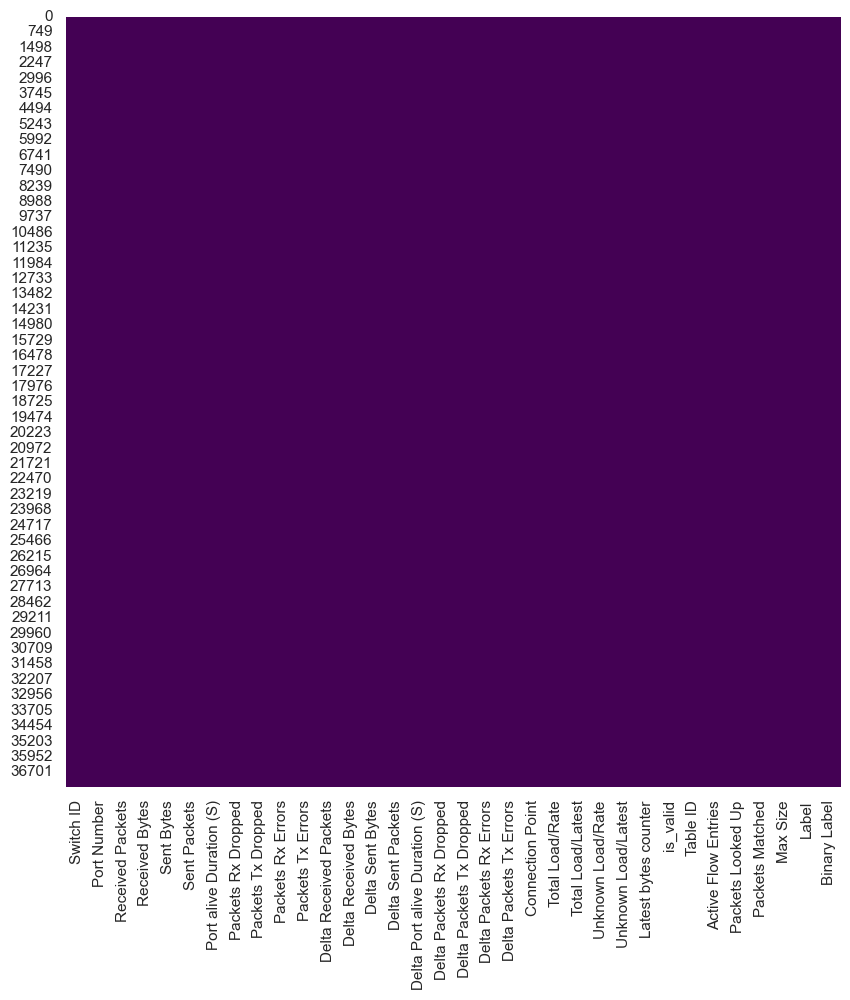

In [276]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [277]:
data.columns

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [279]:
data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [280]:
data.nunique()

Switch ID                           12
Port Number                          4
Received Packets                  9931
Received Bytes                   26044
Sent Bytes                       32456
Sent Packets                     11570
Port alive Duration (S)           1206
Packets Rx Dropped                   1
Packets Tx Dropped                   1
Packets Rx Errors                    1
Packets Tx Errors                    1
Delta Received Packets             676
Delta Received Bytes              3635
Delta Sent Bytes                  3476
Delta Sent Packets                 567
Delta Port alive Duration (S)        2
Delta Packets Rx Dropped             1
 Delta Packets Tx Dropped            1
Delta Packets Rx Errors              1
Delta Packets Tx Errors              1
Connection Point                     5
Total Load/Rate                   1297
Total Load/Latest                 1918
Unknown Load/Rate                 1297
Unknown Load/Latest               1918
Latest bytes counter     

In [281]:
data.isnull().count()

Switch ID                        37411
Port Number                      37411
Received Packets                 37411
Received Bytes                   37411
Sent Bytes                       37411
Sent Packets                     37411
Port alive Duration (S)          37411
Packets Rx Dropped               37411
Packets Tx Dropped               37411
Packets Rx Errors                37411
Packets Tx Errors                37411
Delta Received Packets           37411
Delta Received Bytes             37411
Delta Sent Bytes                 37411
Delta Sent Packets               37411
Delta Port alive Duration (S)    37411
Delta Packets Rx Dropped         37411
 Delta Packets Tx Dropped        37411
Delta Packets Rx Errors          37411
Delta Packets Tx Errors          37411
Connection Point                 37411
Total Load/Rate                  37411
Total Load/Latest                37411
Unknown Load/Rate                37411
Unknown Load/Latest              37411
Latest bytes counter     

In [282]:
numeric_features = ['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets', 'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets', 'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest', 'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up', 'Packets Matched']

In [283]:
print(numeric_features)

['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets', 'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets', 'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest', 'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up', 'Packets Matched']


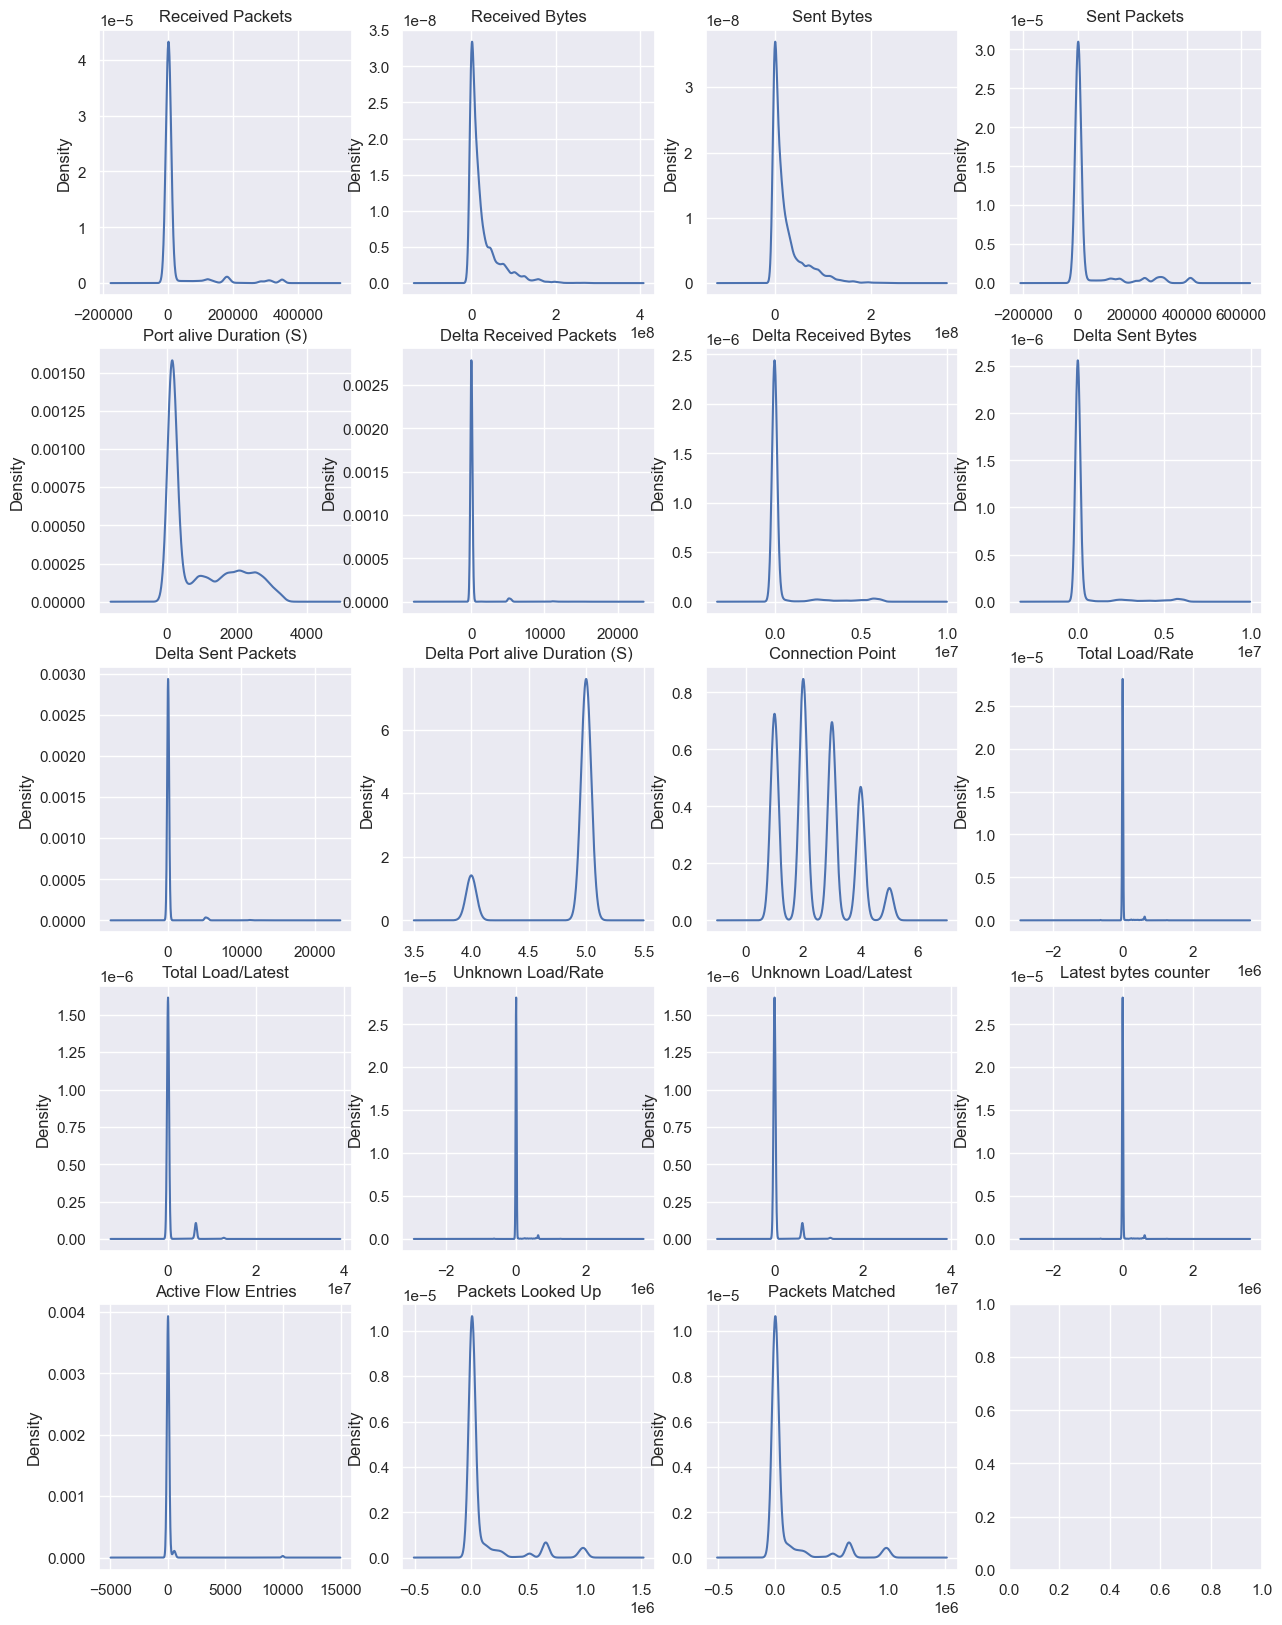

In [284]:
fig,ax = plt.subplots(5,4,figsize=(15,20))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%4 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

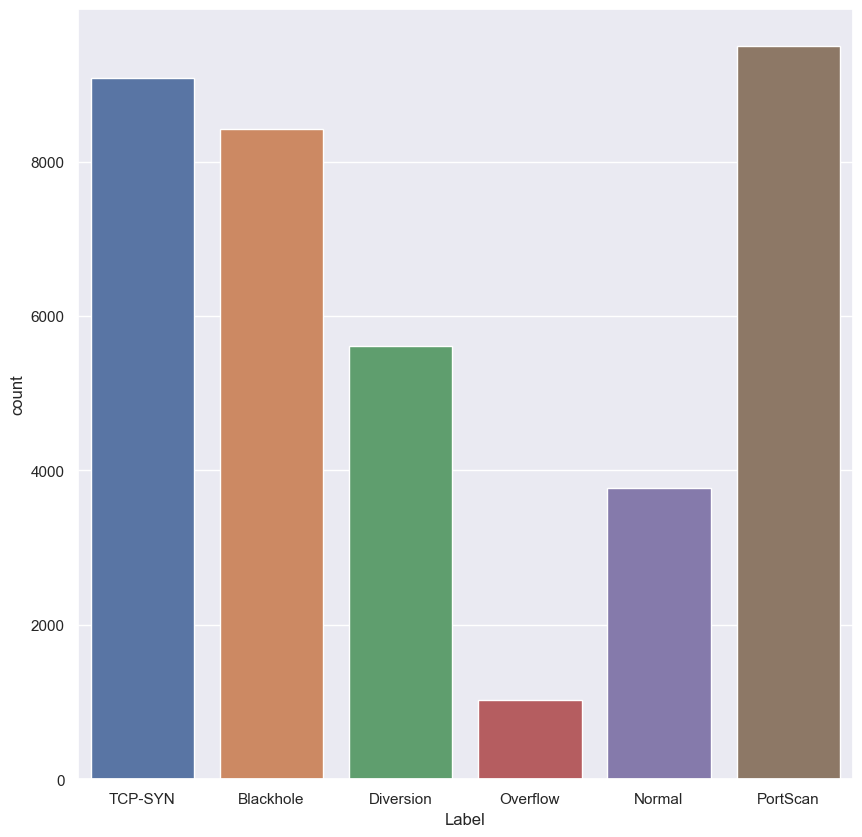

In [285]:
sns.countplot(x ='Label', data = data)
plt.show()

<AxesSubplot:>

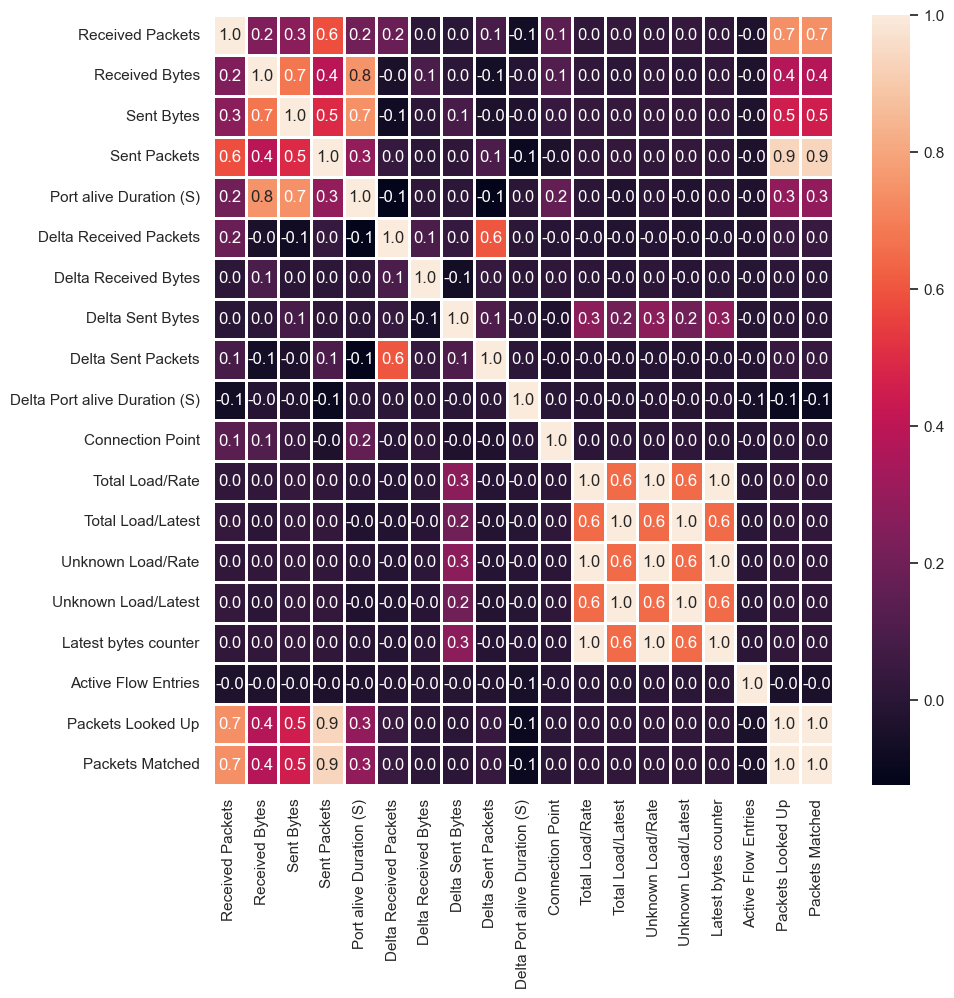

In [286]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data[numeric_features].corr(), annot=True, fmt=".1f",linewidths=1)

## Data Pre-processing 

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score 
from sklearn.feature_selection import RFE

In [288]:
data.drop(columns=['Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors', 'Packets Tx Errors','Delta Packets Rx Dropped',' Delta Packets Tx Dropped','Delta Packets Rx Errors','Delta Packets Tx Errors','is_valid','Table ID','Max Size'], inplace=True)

In [289]:
labelencoder = LabelEncoder()

labelencoder.fit(data['Switch ID'])
data ['Switch ID'] = labelencoder.transform(data['Switch ID'])

labelencoder.fit(data['Port Number'])
data ['Port Number'] = labelencoder.transform(data['Port Number'])

labelencoder.fit(data['Binary Label'])
data ['Binary Label'] = labelencoder.transform(data['Binary Label'])

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  int64 
 1   Port Number                    37411 non-null  int64 
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Delta Received Packets         37411 non-null  int64 
 8   Delta Received Bytes           37411 non-null  int64 
 9   Delta Sent Bytes               37411 non-null  int64 
 10  Delta Sent Packets             37411 non-null  int64 
 11  Delta Port alive Duration (S)  37411 non-null  int64 
 12  Connection Point               37411 non-null  int64 
 13  T

In [291]:
X = data.drop('Label',axis=1).values
y = data['Label'].values

In [292]:
print(X)
print(y)

[[    11      0    132 ...    767    688      0]
 [    11      1    187 ...    767    688      0]
 [    11      2    235 ...    767    688      0]
 ...
 [     8      0   1042 ... 295511 295404      0]
 [     8      1 149012 ... 295511 295404      0]
 [     8      2    228 ... 295511 295404      0]]
['TCP-SYN' 'TCP-SYN' 'TCP-SYN' ... 'PortScan' 'PortScan' 'PortScan']


In [293]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [294]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(26187, 22)
(11224, 22)
(26187,)
(11224,)


## Building the model

In [295]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [296]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['PortScan' 'Blackhole' 'Diversion' ... 'Blackhole' 'TCP-SYN' 'TCP-SYN']
['PortScan' 'Blackhole' 'Diversion' ... 'PortScan' 'TCP-SYN' 'TCP-SYN']


In [297]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

1.0
0.8271560940841055


## Evaluating the performance of the model

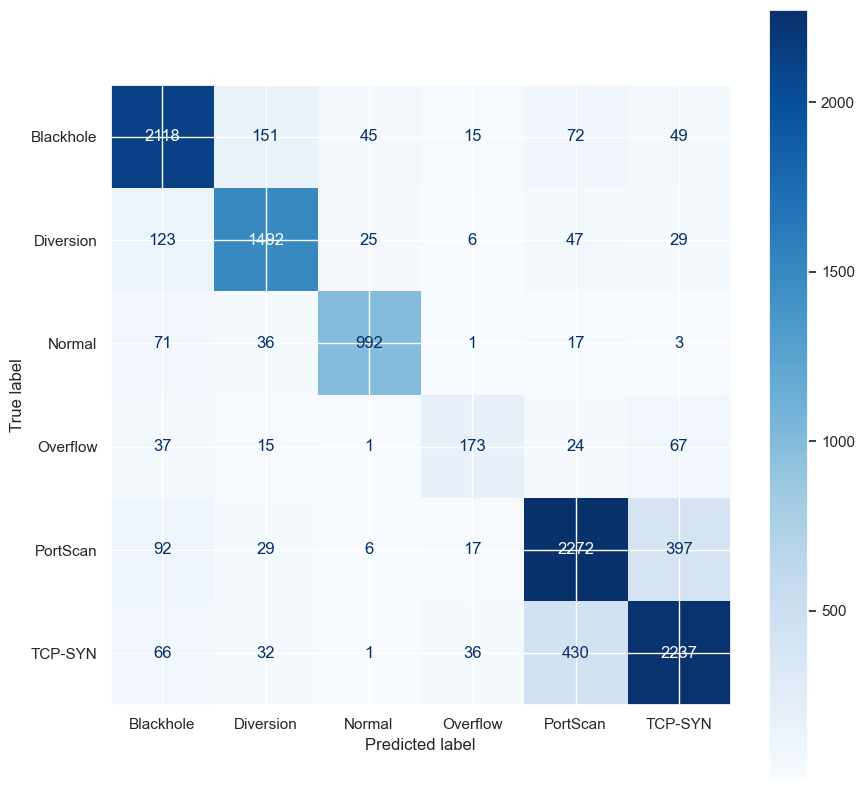

In [298]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Blackhole       0.84      0.86      0.85      2450
   Diversion       0.85      0.87      0.86      1722
      Normal       0.93      0.89      0.91      1120
    Overflow       0.70      0.55      0.61       317
    PortScan       0.79      0.81      0.80      2813
     TCP-SYN       0.80      0.80      0.80      2802

    accuracy                           0.83     11224
   macro avg       0.82      0.79      0.81     11224
weighted avg       0.83      0.83      0.83     11224



## Additional findings

In [300]:
#checking the accuracy with different values of n
train_scores = []
test_scores = []
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors= neighbour)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict (X_test)
    train_score = accuracy_score (y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    train_scores.append (train_score)
    test_scores.append (test_score)

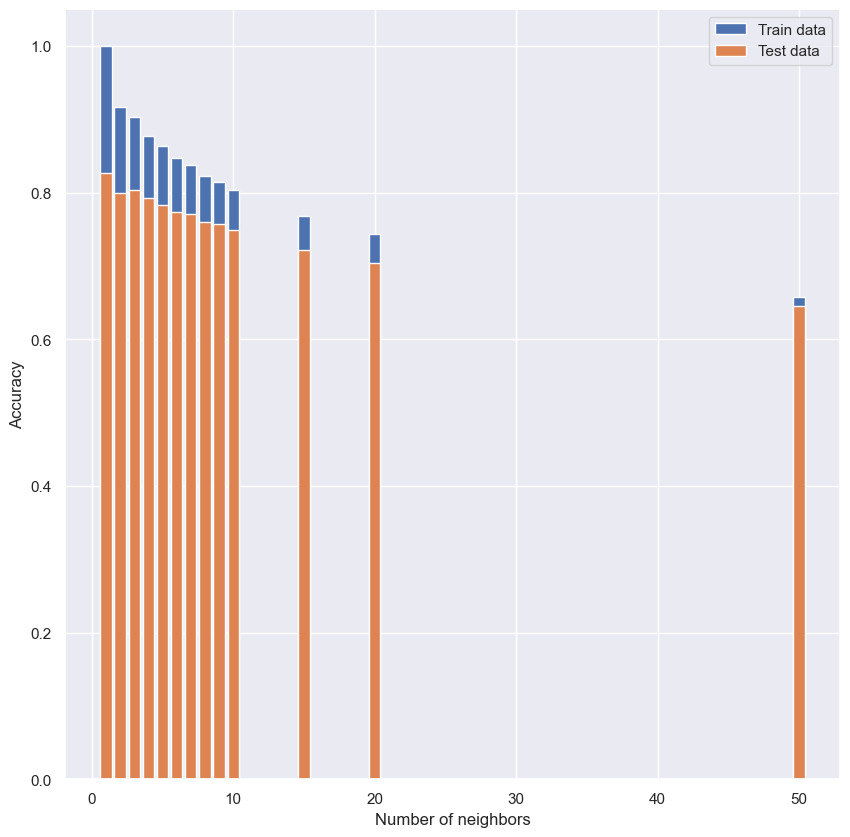

In [301]:
plt.bar(neighbours, train_scores,label='Train data')
plt.bar(neighbours, test_scores,label='Test data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## With different feature selection

In [302]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)
transform_train = pca.transform(X_train)
transform_test = pca.transform(X_test)

In [303]:
explained_variance = pca.explained_variance_ratio_

In [304]:
print(explained_variance)

[8.38727902e-01 1.57527282e-01 2.66564306e-03 5.58907018e-04
 4.74872718e-04 3.64673151e-05 7.83788378e-06 8.47880946e-07
 2.38349356e-07 6.49480684e-10]


In [305]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(transform_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [306]:
y_pred = knn.predict(transform_test)
print (y_pred)
print (y_test)

['PortScan' 'Blackhole' 'Diversion' ... 'Blackhole' 'TCP-SYN' 'TCP-SYN']
['PortScan' 'Blackhole' 'Diversion' ... 'PortScan' 'TCP-SYN' 'TCP-SYN']


In [307]:
print (knn.score(transform_train, y_train))
print (knn.score(transform_test, y_test))

1.0
0.8253741981468282


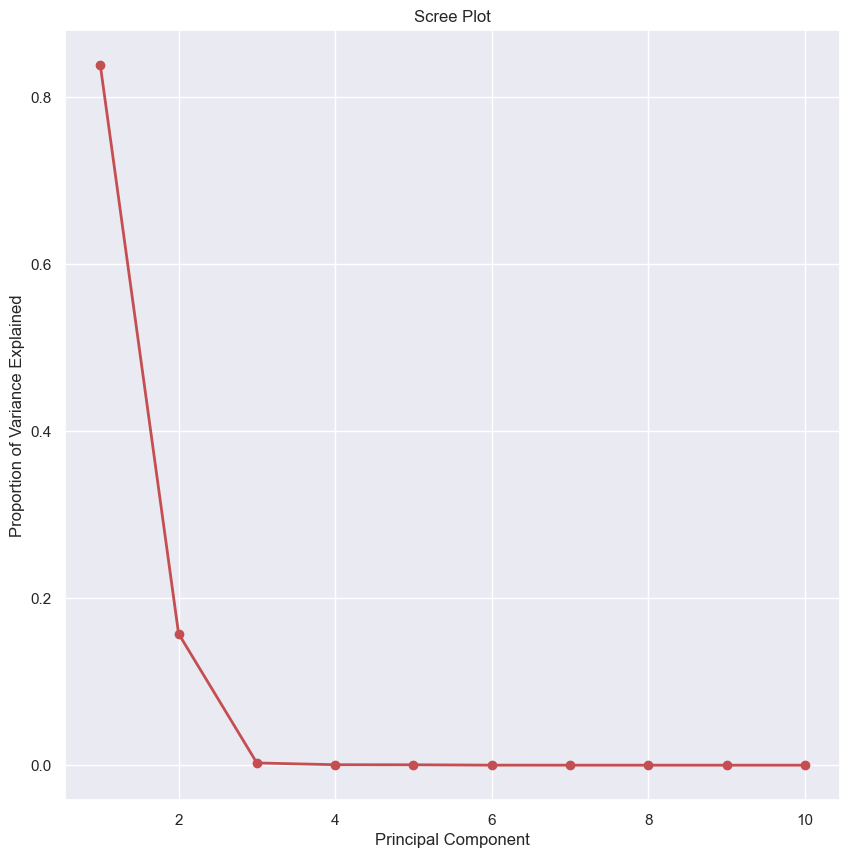

In [308]:
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [309]:
import lime
import lime.lime_tabular

In [310]:
labelencoder.fit(data['Label'])
data ['Label'] = labelencoder.transform(data['Label'])

In [311]:

X = data[data.columns]
#y = data['Label']
print(X)
print(y)
data.info()

       Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0             11            0               132            9181     6311853   
1             11            1               187         6304498       15713   
2             11            2               235         6311567        8030   
3             11            3                59            7878       16439   
4              9            0               188         6304547       16497   
...          ...          ...               ...             ...         ...   
37406          5            1               228           30195     7857046   
37407          5            2              1064        18962056       37732   
37408          8            0              1042        25252012     7856976   
37409          8            1            149012        14360115       29509   
37410          8            2               228           30377    25258600   

       Sent Packets  Port alive Duration (S)  Delta

In [312]:
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.values.tolist(),
                                                  class_names=['Label'], verbose=True, mode='regression')

In [313]:
j = 1
exp = explainer.explain_instance(X.values[j], knn.predict_proba, num_features=5, num_samples=2500)

ValueError: X has 23 features, but KNeighborsClassifier is expecting 10 features as input.

In [ ]:
exp.show_in_notebook(show_table=False)